In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.signal import savgol_filter
from scipy.signal import find_peaks

In [2]:
from sklearn.model_selection import train_test_split
import sklearn
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('LeavingCambourneOntoA428.txt', sep=",", header=None)
data.columns = ["Time", "x", "y", "z"]
#data = np.loadtxt("LeavingCambourneOntoA428.txt", delimiter=',')

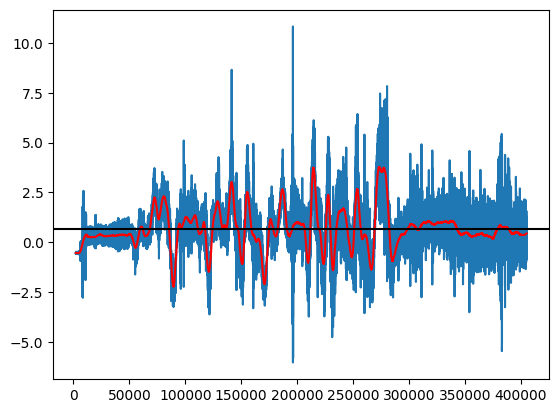

In [4]:
x_filter = savgol_filter(data["x"], window_length=601, polyorder=3)
av_x_tot = np.mean(data["x"])

plt.plot(data["Time"], data["x"])
plt.plot(data["Time"], x_filter, color='r')
plt.axhline(av_x_tot, color='black')
plt.show()

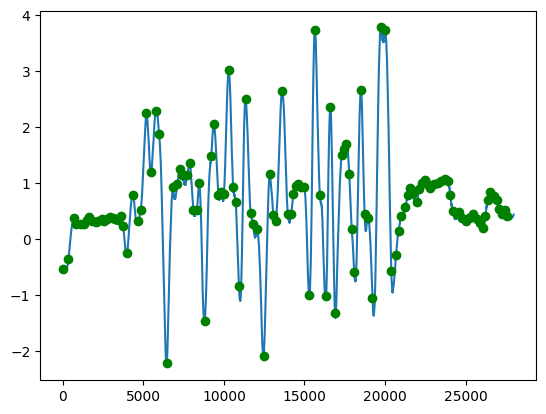

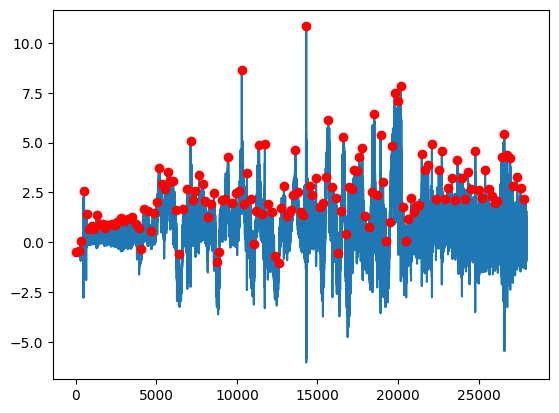

In [5]:
peak_all, _ = find_peaks(data["x"], distance=150)
peak_all_fil, _ = find_peaks(x_filter, distance=150)
plt.scatter(peak_all_fil, x_filter[peak_all_fil], color='g', zorder=20)
plt.plot(x_filter)
plt.show()
plt.plot(data["x"])
plt.scatter(peak_all, data["x"][peak_all], color='r', zorder=10)
plt.show()

In [6]:
def data_class(data, threshold):
    clas = []
    av_data = np.mean(data)
    accept_var = threshold*av_data

    for i in data:
        if i <= av_data + accept_var and i >= av_data - accept_var:
            clas.append(0)
        else:
            clas.append(1)
    
    out = {"Peaks_x": data, 
           "Class" : clas}
    return pd.DataFrame(out)

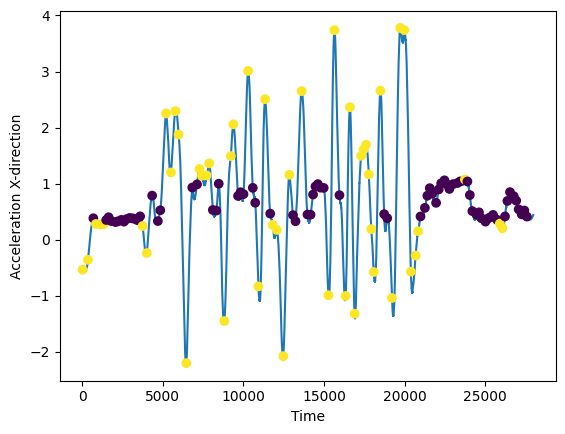

      Peaks_x  Class
0   -0.537338      1
1   -0.359794      1
2    0.382382      0
3    0.279372      1
4    0.270511      1
..        ...    ...
117  0.695920      0
118  0.540679      0
119  0.450857      0
120  0.520178      0
121  0.411050      0

[122 rows x 2 columns]


In [7]:
data_peaks = data_class( x_filter[peak_all_fil], 0.55 )

plt.scatter(peak_all_fil, data_peaks["Peaks_x"], c=data_peaks["Class"], zorder=10)
plt.plot(x_filter)
plt.xlabel('Time')
plt.ylabel('Acceleration X-direction')
plt.savefig('randombullshit.pdf', dpi=1000)
plt.show()

print(data_peaks)

In [8]:
train_dataset = data_peaks.sample(frac=0.8, random_state=0)
test_dataset = data_peaks.drop(train_dataset.index)

In [9]:
# initialise basic model
basic_model = Sequential()
# add input layer 
basic_model.add(Dense(units=16, activation='relu', input_shape=(1,)))

# added another layer to see how it affects performance
basic_model.add(Dense(units=16, activation='relu', input_shape=(1,)))

# add output layer 
basic_model.add(Dense(1, activation='sigmoid')) # sigmoid returns probability of classification 

# optimiser 
adam = keras.optimizers.Adam(learning_rate=0.001)
# binary crossentropy is the entroopy function used for binary classification
basic_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

# summary of the built model - layers params etc.
basic_model.summary()

# train the model on our binary classified data 
basic_model.fit(train_dataset["Peaks_x"], train_dataset["Class"], epochs=1000) #100

C:\AA - Jonathan\University Work\Endeavour\TensorFlow_env\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6356 - loss: 0.7138 
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6033 - loss: 0.7223
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6148 - loss: 0.7140
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6241 - loss: 0.7049
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6096 - loss: 0.7055 
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6002 - loss: 0.7070 
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5960 - loss: 0.7002
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5835 - loss: 0.7007
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5908 - loss: 0.6974
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5627 - loss: 0.7039
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6054 - loss: 0.6936
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy

In [10]:
loss_and_metrics = basic_model.evaluate(train_dataset["Peaks_x"], train_dataset["Class"])
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0526 
[0.052502330392599106, 1.0]
Loss =  0.052502330392599106
Accuracy =  1.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


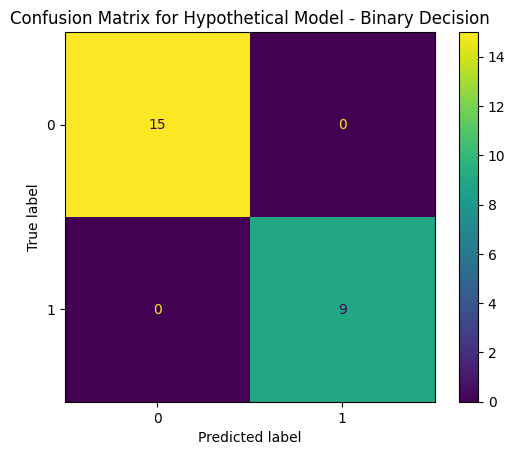

In [11]:
predicted = basic_model.predict(test_dataset["Peaks_x"])
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(test_dataset["Class"])
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()
plt.title('Confusion Matrix for Hypothetical Model - Binary Decision')
plt.show()

#### Adding more Classifiers 
- Leaving estate => 3500:19000
- Roundabout => 19000:20500
- Slip road => 20500:-1

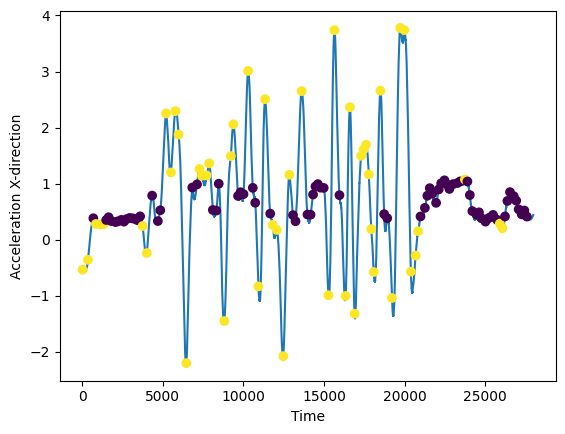

      Peaks_x  Class
0   -0.537338      1
1   -0.359794      1
2    0.382382      0
3    0.279372      1
4    0.270511      1
..        ...    ...
117  0.695920      0
118  0.540679      0
119  0.450857      0
120  0.520178      0
121  0.411050      0

[122 rows x 2 columns]


In [12]:
data_peaks = data_class( x_filter[peak_all_fil], 0.55 )

plt.scatter(peak_all_fil, data_peaks["Peaks_x"], c=data_peaks["Class"], zorder=10)
plt.plot(x_filter)
plt.xlabel('Time')
plt.ylabel('Acceleration X-direction')
plt.savefig('randombullshit.pdf', dpi=1000)
plt.show()

print(data_peaks)

#### Step 1: Leaving the estate

In [13]:
plt.plot(data[:,0][3500:19000], data[:,1][3500:19000])
plt.plot(data[:,0][3500:19000], x_filter[3500:19000], color='r')
plt.axhline(av_x_tot, color='black')
plt.xlabel('Time (s)')
plt.ylabel('X-acceleration (ms^-2)')
plt.show()

peak_1, _ = find_peaks(data[:,1][3500:8000], distance=150)
peak_sav, _ = find_peaks(x_filter[3500:8000], distance=150)

plt.plot(data[:,1][3500:8000])
plt.scatter(peak_1, data[:,1][3500:8000][peak_1], color='r', zorder=10)
plt.axhline(av_x_tot, color='black')

plt.ylabel('Raw data - peak find')
plt.show()
plt.plot(x_filter[3500:8000])
plt.scatter(peak_sav, x_filter[3500:8000][peak_sav], color='r', zorder=10)
plt.axhline(av_x_tot, color='black')
plt.ylabel('Sav filter data - peak find')
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

#### Step 2: Roundabout

In [ ]:
plt.plot(data[:,0][19000:20500], data[:,1][19000:20500])
plt.plot(data[:,0][19000:20500], x_filter[19000:20500], color='r')
plt.show()

#### Step 3: Slip road

In [ ]:
plt.plot(data[:,0][20500:-1], data[:,1][20500:-1])
plt.plot(data[:,0][20500:-1], x_filter[20500:-1], color='r')
plt.show()

### Other axis data 

In [ ]:
y_filter = savgol_filter(data[:,2], 3, 1)
plt.plot(data[:,0], data[:,2])
plt.plot(data[:,0], y_filter, color='r')
plt.show()

In [ ]:
z_filter = savgol_filter(data[:,3], 3, 1)
plt.plot(data[:,0], data[:,3])
plt.plot(data[:,0], z_filter, color='r')
plt.show()